In [179]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import numpy as np
from sklearn.linear_model import LinearRegression


In [180]:
!pip install pandas 

!pip install scikit-learn


In [181]:
df = pd.read_csv('/Users/eric/Documents/Github/Personal_Bank_Budgeting/Checking1.csv') #RUN EVERYTIME
df.head()


,12/30/22,-17,*,Venmo,PURCHASE AUTHORIZED ON 12/30 VENMO* Visa Direct NY S302364781105329 CARD 7605
0,12/30/22,-4.00,*,Venmo,PURCHASE AUTHORIZED ON 12/29 VENMO* Visa Direc...
1,12/30/22,-5.25,*,Food,PURCHASE AUTHORIZED ON 12/28 BEI YUAN TEA & BO...
2,12/28/22,-6.00,*,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* San Jose C...
3,12/27/22,-2.75,*,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
4,12/27/22,-7.00,*,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...


In [182]:
df.rename(columns={'12/30/22': 'Dates'},inplace=True)
df.rename(columns={'-17': 'Money Spent'},inplace=True)
df.rename(columns={'Venmo':'Type of Transaction'},inplace=True)
df.rename(columns={'PURCHASE AUTHORIZED ON 12/30 VENMO* Visa Direct NY S302364781105329 CARD 7605':'Transaction'},inplace=True)
del df['*']
df.head()

,Dates,Money Spent,Type of Transaction,Transaction
0,12/30/22,-4.00,Venmo,PURCHASE AUTHORIZED ON 12/29 VENMO* Visa Direc...
1,12/30/22,-5.25,Food,PURCHASE AUTHORIZED ON 12/28 BEI YUAN TEA & BO...
2,12/28/22,-6.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* San Jose C...
3,12/27/22,-2.75,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
4,12/27/22,-7.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...


In [183]:
df

,Dates,Money Spent,Type of Transaction,Transaction
0,12/30/22,-4.00,Venmo,PURCHASE AUTHORIZED ON 12/29 VENMO* Visa Direc...
1,12/30/22,-5.25,Food,PURCHASE AUTHORIZED ON 12/28 BEI YUAN TEA & BO...
2,12/28/22,-6.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* San Jose C...
3,12/27/22,-2.75,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
4,12/27/22,-7.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
...,...,...,...,...
435,1/3/22,-164.12,Food,PURCHASE AUTHORIZED ON 01/01 HANDOO SAN DIEGO ...
436,1/3/22,-4.95,Food,PURCHASE AUTHORIZED ON 01/01 CHICK-FIL-A #0381...
437,1/3/22,-11.54,Food,PURCHASE AUTHORIZED ON 12/30 RAISING CANE'S 49...
438,1/3/22,139.00,Paid,VENMO CASHOUT 220102 1017725962825 ERIC KYE


In [184]:
df['Money Spent'] = df['Money Spent'].multiply(-1)


df.head()


df

,Dates,Money Spent,Type of Transaction,Transaction
0,12/30/22,4.00,Venmo,PURCHASE AUTHORIZED ON 12/29 VENMO* Visa Direc...
1,12/30/22,5.25,Food,PURCHASE AUTHORIZED ON 12/28 BEI YUAN TEA & BO...
2,12/28/22,6.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* San Jose C...
3,12/27/22,2.75,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
4,12/27/22,7.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
...,...,...,...,...
435,1/3/22,164.12,Food,PURCHASE AUTHORIZED ON 01/01 HANDOO SAN DIEGO ...
436,1/3/22,4.95,Food,PURCHASE AUTHORIZED ON 01/01 CHICK-FIL-A #0381...
437,1/3/22,11.54,Food,PURCHASE AUTHORIZED ON 12/30 RAISING CANE'S 49...
438,1/3/22,-139.00,Paid,VENMO CASHOUT 220102 1017725962825 ERIC KYE


In [185]:
df.columns


Index(['Dates', 'Money Spent', 'Type of Transaction', 'Transaction'], dtype='object')

In [186]:
df.describe()

,Money Spent
count,440.000000
mean,-4.825955
std,143.504533
min,-988.000000
25%,3.770000
50%,8.585000
75%,17.067500
max,1000.000000


In [187]:
df['Dates'] = pd.to_datetime(df['Dates'])



df['Month'] = df['Dates'].dt.month 


df


#putting the dates into date time format, and extracting the month to have a month by month analysis 


,Dates,Money Spent,Type of Transaction,Transaction,Month
0,2022-12-30,4.00,Venmo,PURCHASE AUTHORIZED ON 12/29 VENMO* Visa Direc...,12
1,2022-12-30,5.25,Food,PURCHASE AUTHORIZED ON 12/28 BEI YUAN TEA & BO...,12
2,2022-12-28,6.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* San Jose C...,12
3,2022-12-27,2.75,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...,12
4,2022-12-27,7.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...,12
...,...,...,...,...,...
435,2022-01-03,164.12,Food,PURCHASE AUTHORIZED ON 01/01 HANDOO SAN DIEGO ...,1
436,2022-01-03,4.95,Food,PURCHASE AUTHORIZED ON 01/01 CHICK-FIL-A #0381...,1
437,2022-01-03,11.54,Food,PURCHASE AUTHORIZED ON 12/30 RAISING CANE'S 49...,1
438,2022-01-03,-139.00,Paid,VENMO CASHOUT 220102 1017725962825 ERIC KYE,1


In [188]:
month = df.groupby('Month')

month.mean()

month.describe()

#stats per month



Money Spent                                                          \
            count       mean         std     min     25%     50%      75%   
Month                                                                       
1            50.0   8.689000   40.859777 -139.00  4.4050   9.125  12.6800   
2            34.0 -11.582059   98.713434 -539.77  1.6375   7.220  16.1875   
3            56.0 -10.593393  116.456941 -619.39  3.0425   8.620  14.7275   
4            29.0  -8.308276   99.586833 -520.67  5.0000   8.850  13.0500   
5            33.0 -34.101515  140.777874 -542.95 -8.0000   6.480  13.0000   
6            26.0 -15.889231  147.872063 -590.09  5.0000  17.950  25.0000   
7            24.0   5.336250   40.857957 -176.00  2.8225   5.985  23.9500   
8            37.0 -42.422162  226.869801 -988.00  4.0000   8.000  16.9200   
9            43.0   2.665581   86.469058 -287.00  5.0000   8.550  18.2350   
10           42.0  16.273571  198.594062 -640.00  5.0625  12.510  21.2625   
11           34.0  -6.842059  118.287730 -666.99  4.1000  11.505  18.9725   
12           32.0  33.894687  252.744547 -523.00  4.8550  10.630  15.5225   

                
           max  
Month           
1       164.12  
2        33.49  
3       320.00  
4        43.60  
5       100.00  
6       124.94  
7        46.99  
8        49.99  
9       214.22  
10      689.80  
11       77.00  
12     1000.00

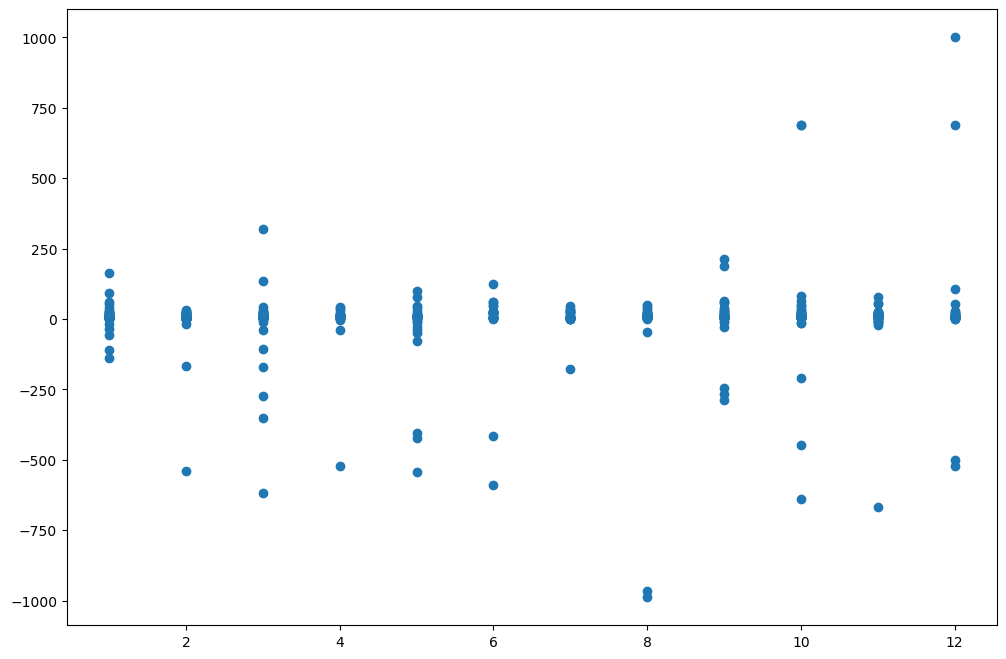

In [189]:
plt.figure(figsize=(12,8))
plt.scatter(data=df, x='Month', y='Money Spent')

#scatter plot of Money Spent vs Month

In [190]:
x=df['Month']
y=df['Money Spent']
x.corr(y)

#getting a correlation coefficent between x and y, clearly no linear relationship between Month and money spent

0.03867340159579912

<AxesSubplot:xlabel='Money Spent', ylabel='Density'>

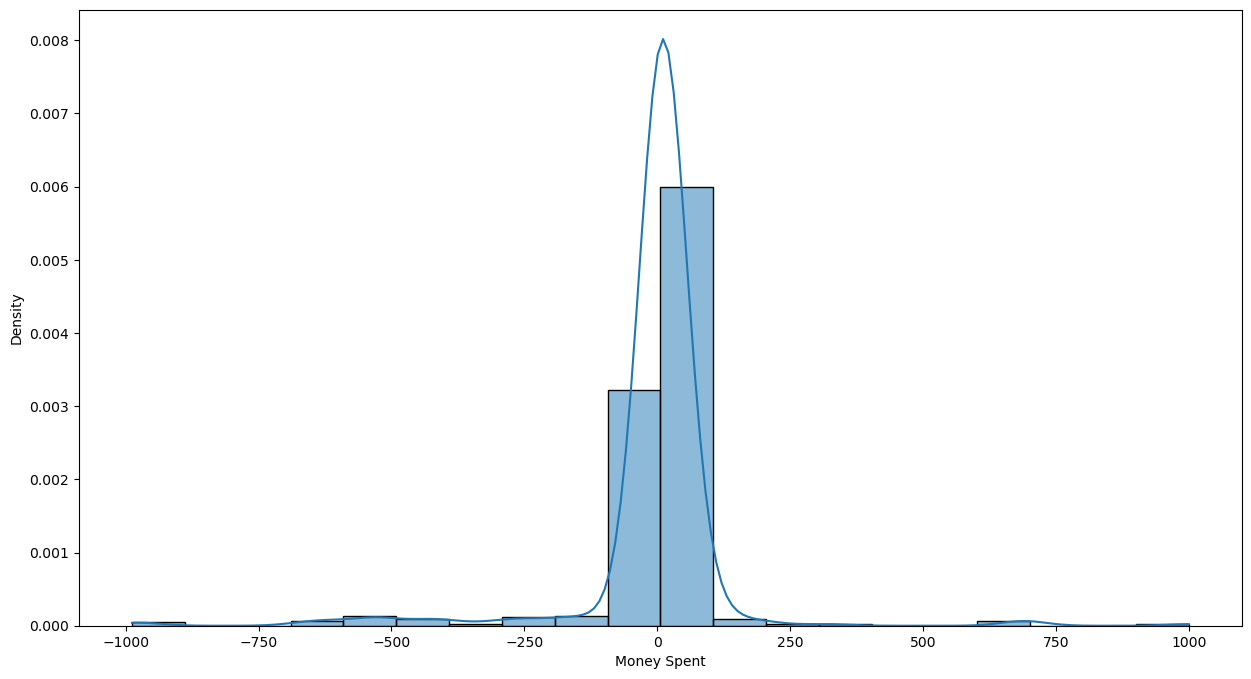

In [191]:
plt.figure(figsize=(15,8))
sns.histplot(x='Money Spent',data=df,bins=20,kde=True,stat='density')

#histogram of money spent

In [192]:
fig = px.line(df, x='Dates', y="Money Spent")
fig.show()

# time series plot of money spent vs dates

In [193]:
fig = px.line(df, x='Month', y="Money Spent")
fig.show()


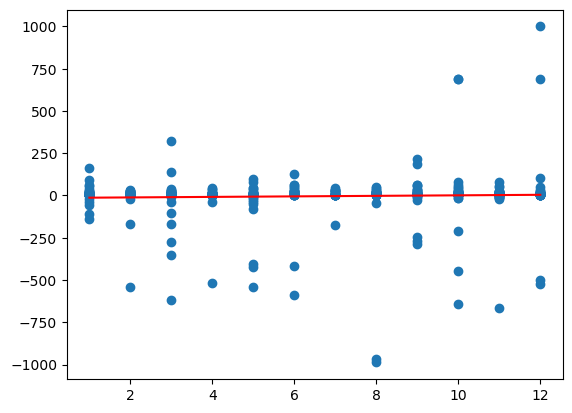

Regression Line Equation= 1.54678067251763 X + -14.50036456992845


In [204]:
X=df['Month'].values.reshape(-1, 1)
Y=df['Money Spent'].values.reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

#linear regression model, almost constant 



N = len(X)


x_mean = X.mean()
y_mean = Y.mean()
 
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den
    
B0 = y_mean - (B1*x_mean)
    

print ("Regression Line Equation=", B1,"X +",B0)
